In [18]:
"""Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами,
обучите деревья с глубиной от 1 до 100. При этом записывайте его скор (DecisionTreeClassifier.score()) 
на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. 
Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите
правильную визуализацию из предложенных.

Важно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)

np.random.seed(0)
my_awesome_tree = DecisionTreeClassifier(...)
или

my_awesome_tree = DecisionTreeClassifier(random_state=0, ...)"""

'Убедимся в том, что всё так происходит на самом деле. Скачайте тренировочный датасэт с ирисами,\nобучите деревья с глубиной от 1 до 100. При этом записывайте его скор (DecisionTreeClassifier.score()) \nна тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. \nЗатем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите\nправильную визуализацию из предложенных.\n\nВажно: задайте random seed прямо перед созданием дерева или укажите его в параметрах дерева (random_state=rs)\n\nnp.random.seed(0)\nmy_awesome_tree = DecisionTreeClassifier(...)\nили\n\nmy_awesome_tree = DecisionTreeClassifier(random_state=0, ...)'

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn import tree

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [6]:
iris_train=pd.read_csv('train_iris.csv')

In [7]:
iris_test=pd.read_csv('test_iris.csv')


In [8]:
X_train=iris_train.drop(['Unnamed: 0', 'species'], axis=1)
y_train=iris_train.species

In [9]:
X_test=iris_test.drop(['Unnamed: 0', 'species'], axis=1)
y_test=iris_test.species

In [10]:
iris_test.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [11]:
np.random.seed(0)

In [12]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [20]:
max_depth_value = range(1,100)

In [29]:
scores_data = pd.DataFrame()

In [30]:
for max_depth in max_depth_value:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train,y_train)
    test_score= clf.score(X_test,y_test)
    mean_cross_val_score=cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data=pd.DataFrame({'max_depth': [max_depth], 'train_score' : train_score, 'test_score' : test_score, 'mean_crosss_val' : mean_cross_val_score})
    scores_data=scores_data.append(temp_score_data)

In [31]:
scores_data.head()

,max_depth,train_score,test_score,mean_crosss_val
0,1,0.70,0.60,0.70
0,2,0.97,0.94,0.95
0,3,0.99,0.94,0.96
0,4,1.00,0.92,0.96
0,5,1.00,0.92,0.96


In [32]:
scores_data_long=pd.melt(scores_data,id_vars=['max_depth'], value_vars=['train_score','test_score','mean_crosss_val'],\
                         var_name='set_type', value_name='scores')

In [33]:
scores_data_long.head()


,max_depth,set_type,scores
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


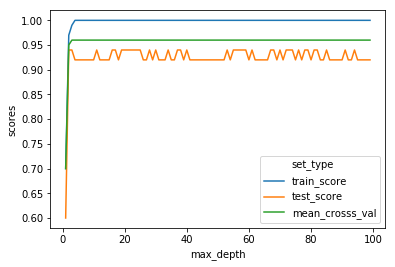

In [34]:
sns.lineplot(data=scores_data_long, x='max_depth', y='scores', hue='set_type')